<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/PSO_hw16_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW16 Edge-Preserving Smoothing (The Bilateral Filter)

## Introduction
Standard linear filters, like the Gaussian blur, are excellent for removing noise, but they have a significant downside: they smooth everything, including edges. This results in a loss of structural detail.The Bilateral Filter is a non-linear filter that solves this by considering two factors when calculating the weight of a neighbor pixel:
* Spatial Distance: How far is the neighbor from the center? (Like a standard Gaussian).
* Range (Intensity) Distance: How similar is the neighbor's intensity to the center?If a neighbor is close in space but very different in intensity (e.g., across an edge), it gets a low weight, preserving the edge.

### Mathematical Formulation
For a pixel at location $p$, the filtered output $BF[I]_p$ is defined as:$$BF[I]_p = \frac{1}{W_p} \sum_{q \in S_p} G_{\sigma_s}(||p - q||) \cdot G_{\sigma_r}(|I_p - I_q|) \cdot I_q,$$
where:
* $S_p$ is the neighborhood of $p$.
* $G_{\sigma_s}$ is the spatial Gaussian kernel (parameter $\sigma_s$).
* $G_{\sigma_r}$ is the range (intensity) Gaussian kernel (parameter $\sigma_r$).
* $||p - q||$ is the spatial (Euclidean) distance.
* $|I_p - I_q|$ is the intensity difference.
* $W_p$ is the normalization factor (sum of weights, e.g. $W_p = \sum_{q \in S_p} G_{\sigma_s}(||p - q||) \cdot G_{\sigma_r}(|I_p - I_q|)$)

The Gaussian function is defined as $G_{\sigma}(x) = \frac{1}{\pi \sigma^2} e^{\frac{-x^2}{2 \sigma^2}}$. Since you will normalize the weights anyways you can use $G_{\sigma}(x) \sim e^{\frac{-x^2}{2 \sigma^2}}$. The function is provided to you in the code block below.



In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Gaussian function
def gaussian(x, sigma):
    return (1.0 / (2 * np.pi * (sigma ** 2))) * np.exp(-(x ** 2) / (2 * (sigma ** 2)))

# Simplified Gaussian for weights (ignoring constant factor as it cancels out in normalization)
def gaussian_weight(delta, sigma):
    return np.exp(-(delta ** 2) / (2 * sigma ** 2))

def gshow(img, title=None):
  plt.imshow(img, cmap='gray', vmin=0, vmax=1.0)
  plt.title(title)
  plt.axis("off")
  plt.show()

### Implementation
Implement the Bilateral FilterImplement the function `my_bilateral_filter`.

Note: To keep execution time reasonable for this homework, you may implement this using nested loops, but it will be slow. We will run it on a small image or a crop.

Requirements:
* Create a window of size (2*radius + 1).
* Pre-compute the Spatial Kernel (since it doesn't change per pixel) to improve performance.
* Iterate over the image (ignoring borders for simplicity or padding them).
* For every window, compute the Range Kernel dynamically based on intensity differences.
* Multiply Spatial and Range weights to get the final weights.

In [ ]:
def my_bilateral_filter(img, radius, sigma_s, sigma_r):
    # Params:
    #  img: h x w array holding grayscale image in floats with range 0.0-1.0
    #  radius: The radius of the window (window size will be 2*radius+1)
    #  sigma_s: Spatial standard deviation
    #  sigma_r: Range (intensity) standard deviation
    # Returns:
    #  Filtered image

    #implement
    return output

You can compare your code first on synthetic data and then on real data (we keep resize the image since bilateral filtering is expensive).

In [ ]:
def show_images(images, titles, figsize=(15, 5)):
  plt.figure(figsize=figsize)
  for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
  plt.show()

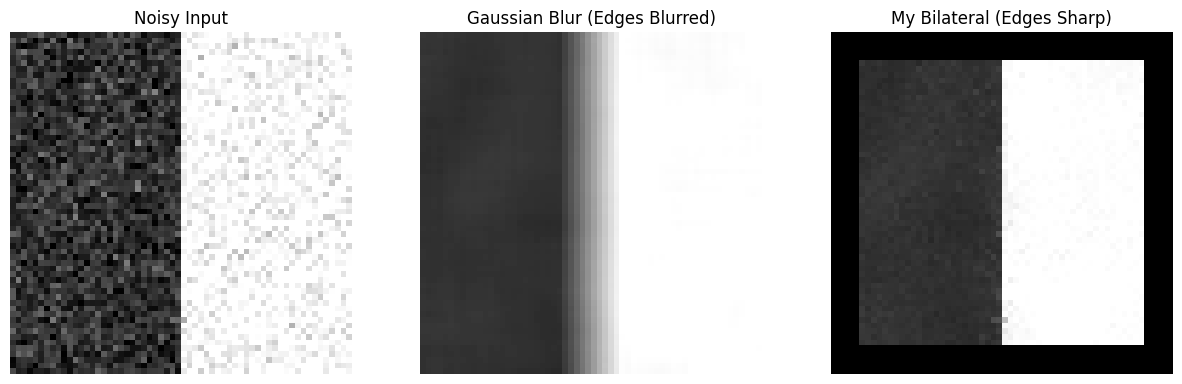

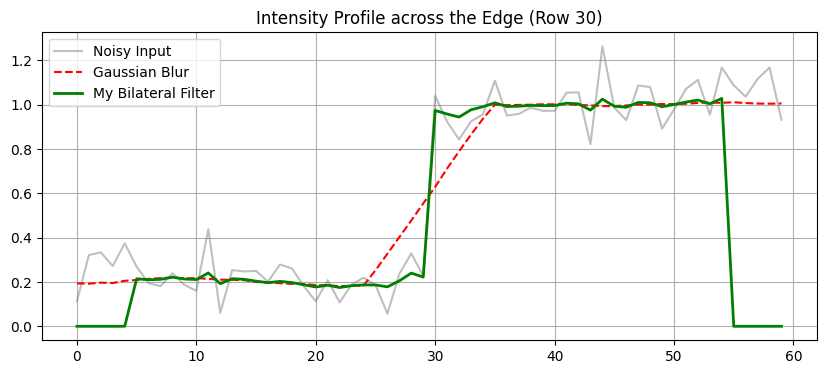

In [ ]:
hw_size = 60
synthetic_img = np.zeros((hw_size, hw_size))
synthetic_img[:, :hw_size//2] = 0.2
synthetic_img[:, hw_size//2:] = 1.0

noise = np.random.normal(0, 0.1, synthetic_img.shape)
synthetic_noisy = synthetic_img + noise

filtered_synthetic = my_bilateral_filter(synthetic_noisy, radius=5, sigma_s=30, sigma_r=75/255)


gaussian_blur = cv2.GaussianBlur(synthetic_noisy, (11, 11), 10)

# Visualization
show_images([synthetic_noisy, gaussian_blur, filtered_synthetic],
            ["Noisy Input", "Gaussian Blur (Edges Blurred)", "My Bilateral (Edges Sharp)"])

plt.figure(figsize=(10, 4))
plt.plot(synthetic_noisy[30, :], label='Noisy Input', alpha=0.5, color='gray')
plt.plot(gaussian_blur[30, :], label='Gaussian Blur', linestyle='--', color='red')
plt.plot(filtered_synthetic[30, :], label='My Bilateral Filter', linewidth=2, color='green')
plt.legend()
plt.title("Intensity Profile across the Edge (Row 30)")
plt.grid(True)
plt.show()

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg

--2025-11-27 14:21:34--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57259 (56K) [image/jpeg]
Saving to: ‘building.jpg.1’

building.jpg.1      100%[===================>]  55.92K  --.-KB/s    in 0.001s  

2025-11-27 14:21:35 (39.0 MB/s) - ‘building.jpg.1’ saved [57259/57259]



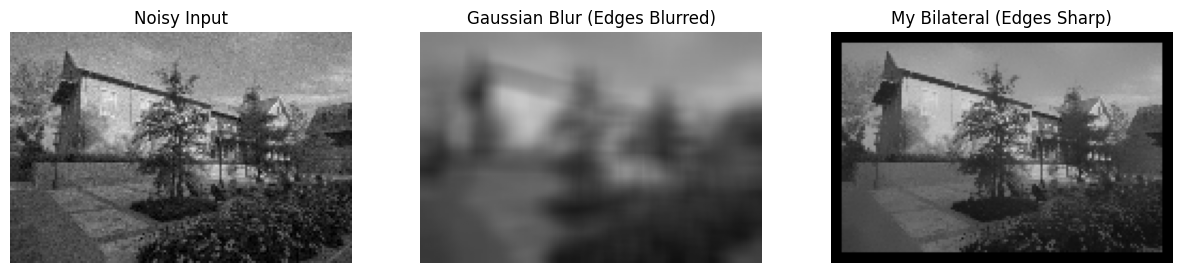

In [ ]:
import cv2

building = cv2.resize(cv2.cvtColor(cv2.imread('building.jpg'), cv2.COLOR_BGR2GRAY), None, fx=0.25, fy=0.25) / 255.0
noisy_building = building + np.random.normal(0, 0.03, building.shape)

filtered_synthetic = my_bilateral_filter(noisy_building, radius=5, sigma_s=20, sigma_r=20/255)


gaussian_blur = cv2.GaussianBlur(noisy_building, (11, 11), 10)

# Visualization
show_images([noisy_building, gaussian_blur, filtered_synthetic],
            ["Noisy Input", "Gaussian Blur (Edges Blurred)", "My Bilateral (Edges Sharp)"])
